## Visualize the network data

NetworkX is a powerful Python library designed for the creation, manipulation, and analysis of complex networks or graphs. With an extensive range of built-in functions and algorithms, NetworkX offers a versatile platform for studying various network structures and properties. It provides tools for constructing graphs from diverse data sources, including edge lists, adjacency matrices, and other network representations. Users can effortlessly add, remove, or modify nodes and edges, enabling dynamic network construction and manipulation. Additionally, NetworkX offers a rich set of algorithms for network analysis, including centrality measures, community detection methods, and graph traversal algorithms. Whether used for academic research, data analysis, or network visualization, NetworkX serves as a comprehensive toolkit for exploring and understanding the intricate structures and dynamics of complex networks.

In [1]:
#pip install networkx pyvis

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

### Basic node-link diagram plotting

#### layout options

- bipartite_layout: Position nodes in two straight lines. Can choose vertical or horizental layout but need to provide the list of nodes that will be placed on left/top. `pos = nx.bipartite_layout(G, nodes, align='vertical')` 
- circular_layout: Position nodes on a circle. `pos = nx.circular_layout(G)`
- kamada_kawai_layout: Position nodes using Kamada-Kawai path-length cost-function (One type of force-directed algorithm and will adjust for weights). `pos = nx.kamada_kawai_layout(G, weight='weight')`
- planar_layout: Position nodes without edge intersections. If the graph is not a planar, then cannot be used. `pos = nx.planar_layout(G)`
- random_layout: Position nodes uniformly at random in the unit square. For every node, a position is generated by choosing each of dim coordinates uniformly at random on the interval [0.0, 1.0). `pos = nx.random_layout(G)`
- shell_layout: Position nodes in concentric circles. You can use nlist to label the node for each shell. `pos = nx.shell_layout(G, nlist=None)`
- spring_layout: Position nodes using Fruchterman-Reingold force-directed algorithm. `pos = nx.spring_layout(G)`
- spectral_layout: Position nodes using the eigenvectors of the graph Laplacian. Using the unnormalized Laplacian, the layout shows possible clusters of nodes which are an approximation of the ratio cut. `pos = nx.spectral_layout(G)`
- spiral_layout: Position nodes in a spiral layout. `pos = nx.spiral_layout(G)`
- multipartite_layout: Position nodes in layers of straight lines. `pos = nx.multipartite_layout(G, subset_key='subset', align='vertical')`

### Including attributes

In [6]:
labels = random.choices(["A", "B", "C"], k = len(G.nodes()))

sizes = random.choices(range(10,101), k = len(G.nodes()))

weights = [random.uniform(0.1, 1) for _ in range(len(G.edges()))]

In [7]:
node_color = {'A': "#66c2a5", 'B': "#fc8d62", 'C': "#8da0cb"}
color_labels = [node_color[label] for label in labels]

## Apply to the email data

This network was generated using email data from a large European research institution. We have anonymized information about all incoming and outgoing email between members of the research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core), and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. 
The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institut 

For the purpose of practice, we only take part of the network with only the emails within three domain department. e.

In [18]:
labels = pd.read_csv('labels_small.csv')
labels.head()

,id,department
0,0,Group01
1,1,Group01
2,7,Group14
3,8,Group14
4,9,Group14


In [19]:
links = pd.read_csv('links_small.csv')
links.head()

,source,target
0,0,1
1,8,9
2,12,14
3,17,18
4,12,19


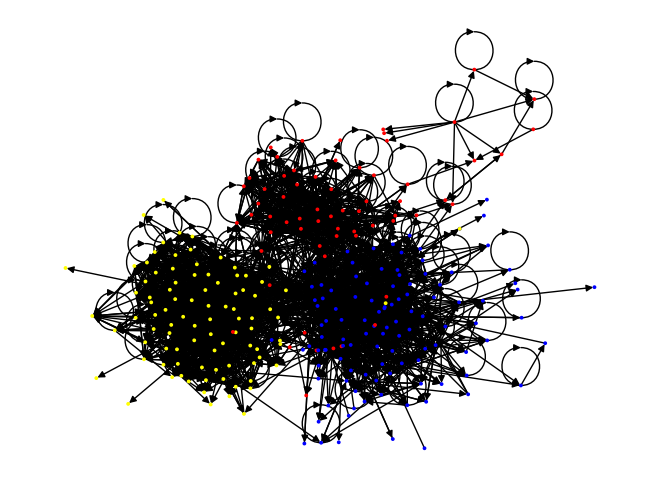

In [22]:
#pos = nx.spring_layout(G, iterations=100, scale=0.1)
pos = nx.kamada_kawai_layout(G)

## Interactive network

Pyvis is a Python library that provides a simple and interactive way to visualize networks and graphs. Built on top of the popular NetworkX library, Pyvis allows users to create interactive visualizations of complex networks with ease. With Pyvis, users can add nodes and edges to the network, customize node and edge attributes such as labels, colors, and sizes, and create interactive HTML visualizations that can be easily shared and embedded in web applications or notebooks. Pyvis provides various interactive features, including zooming, panning, and tooltips, allowing users to explore and interact with the network visualization dynamically. 

In [16]:
from pyvis.network import Network

# set the physics layout of the network
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
net.barnes_hut()

#### In-class activities: 

Make an interactive network with the stormofswords.csv. 

In [17]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("stormofswords.csv")

### Visualize the adjacency matrix

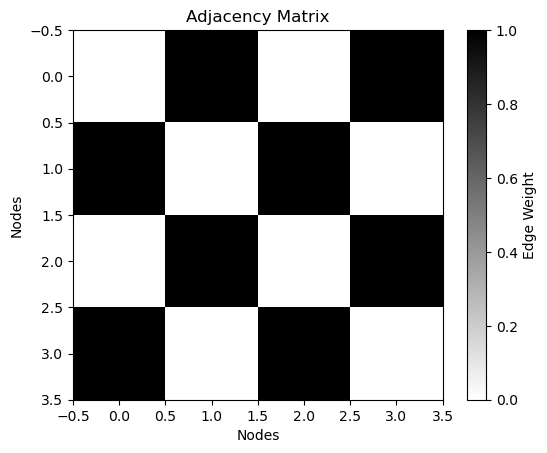

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample adjacency matrix (as numpy array)
adjacency_matrix = np.array([
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
])

# Plot the adjacency matrix
plt.imshow(adjacency_matrix, cmap='binary', interpolation='none')
plt.title('Adjacency Matrix')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.colorbar(label='Edge Weight')
plt.show()


In [18]:
import numpy as np

# Sample adjacency matrix (as numpy array)
adjacency_matrix = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])

# Initialize empty edge list
edge_list = []

# Iterate through the adjacency matrix
for i in range(len(adjacency_matrix)):
    for j in range(i + 1, len(adjacency_matrix)):  # Only iterate over upper triangle (assuming undirected graph)
        if adjacency_matrix[i][j] != 0:
            # Add edge to edge list
            edge_list.append((i, j))

print(edge_list)

[(0, 1), (1, 2)]
